In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
import plotly.express as px

In [2]:
data = load_breast_cancer()
description = data.DESCR.split('\n')
print("\n".join(description[11:31]))

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - class:
            - WDBC-Malignant
            - WDBC-Benign


In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.shape

(569, 31)

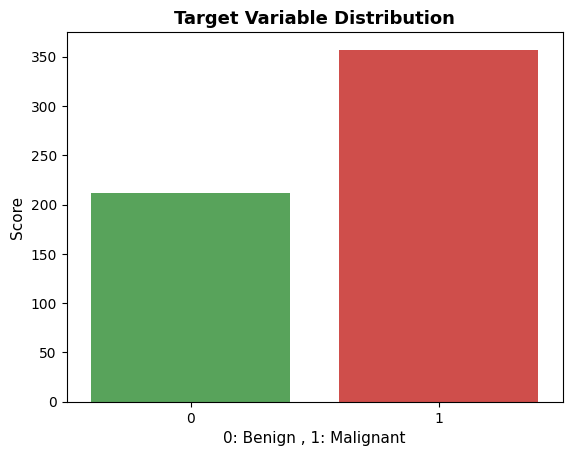

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


df['target'] = df['target'].astype(str)


palette = {"0": "#4CAF50", 
            "1": "#E53935"} 

sns.countplot(x='target', hue='target', data=df, palette=palette, legend=False)

plt.title('Target Variable Distribution', fontsize=13, weight='bold')
plt.xlabel('0: Benign , 1: Malignant', fontsize=11)
plt.ylabel('Score', fontsize=11)
plt.show()


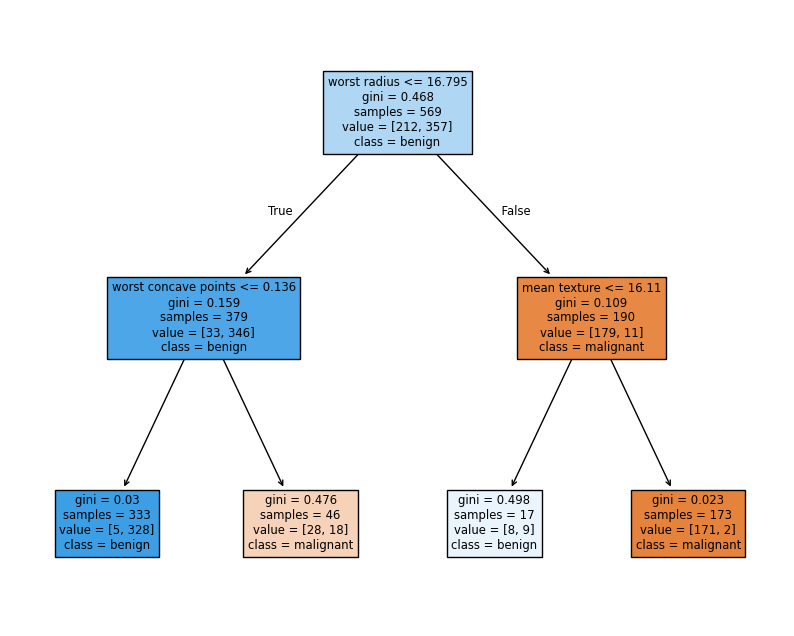

In [9]:
clf = DecisionTreeClassifier(max_depth=2)
x = data.data
y = data.target
clf.fit(x, y)
plt.figure(figsize=(10,8))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

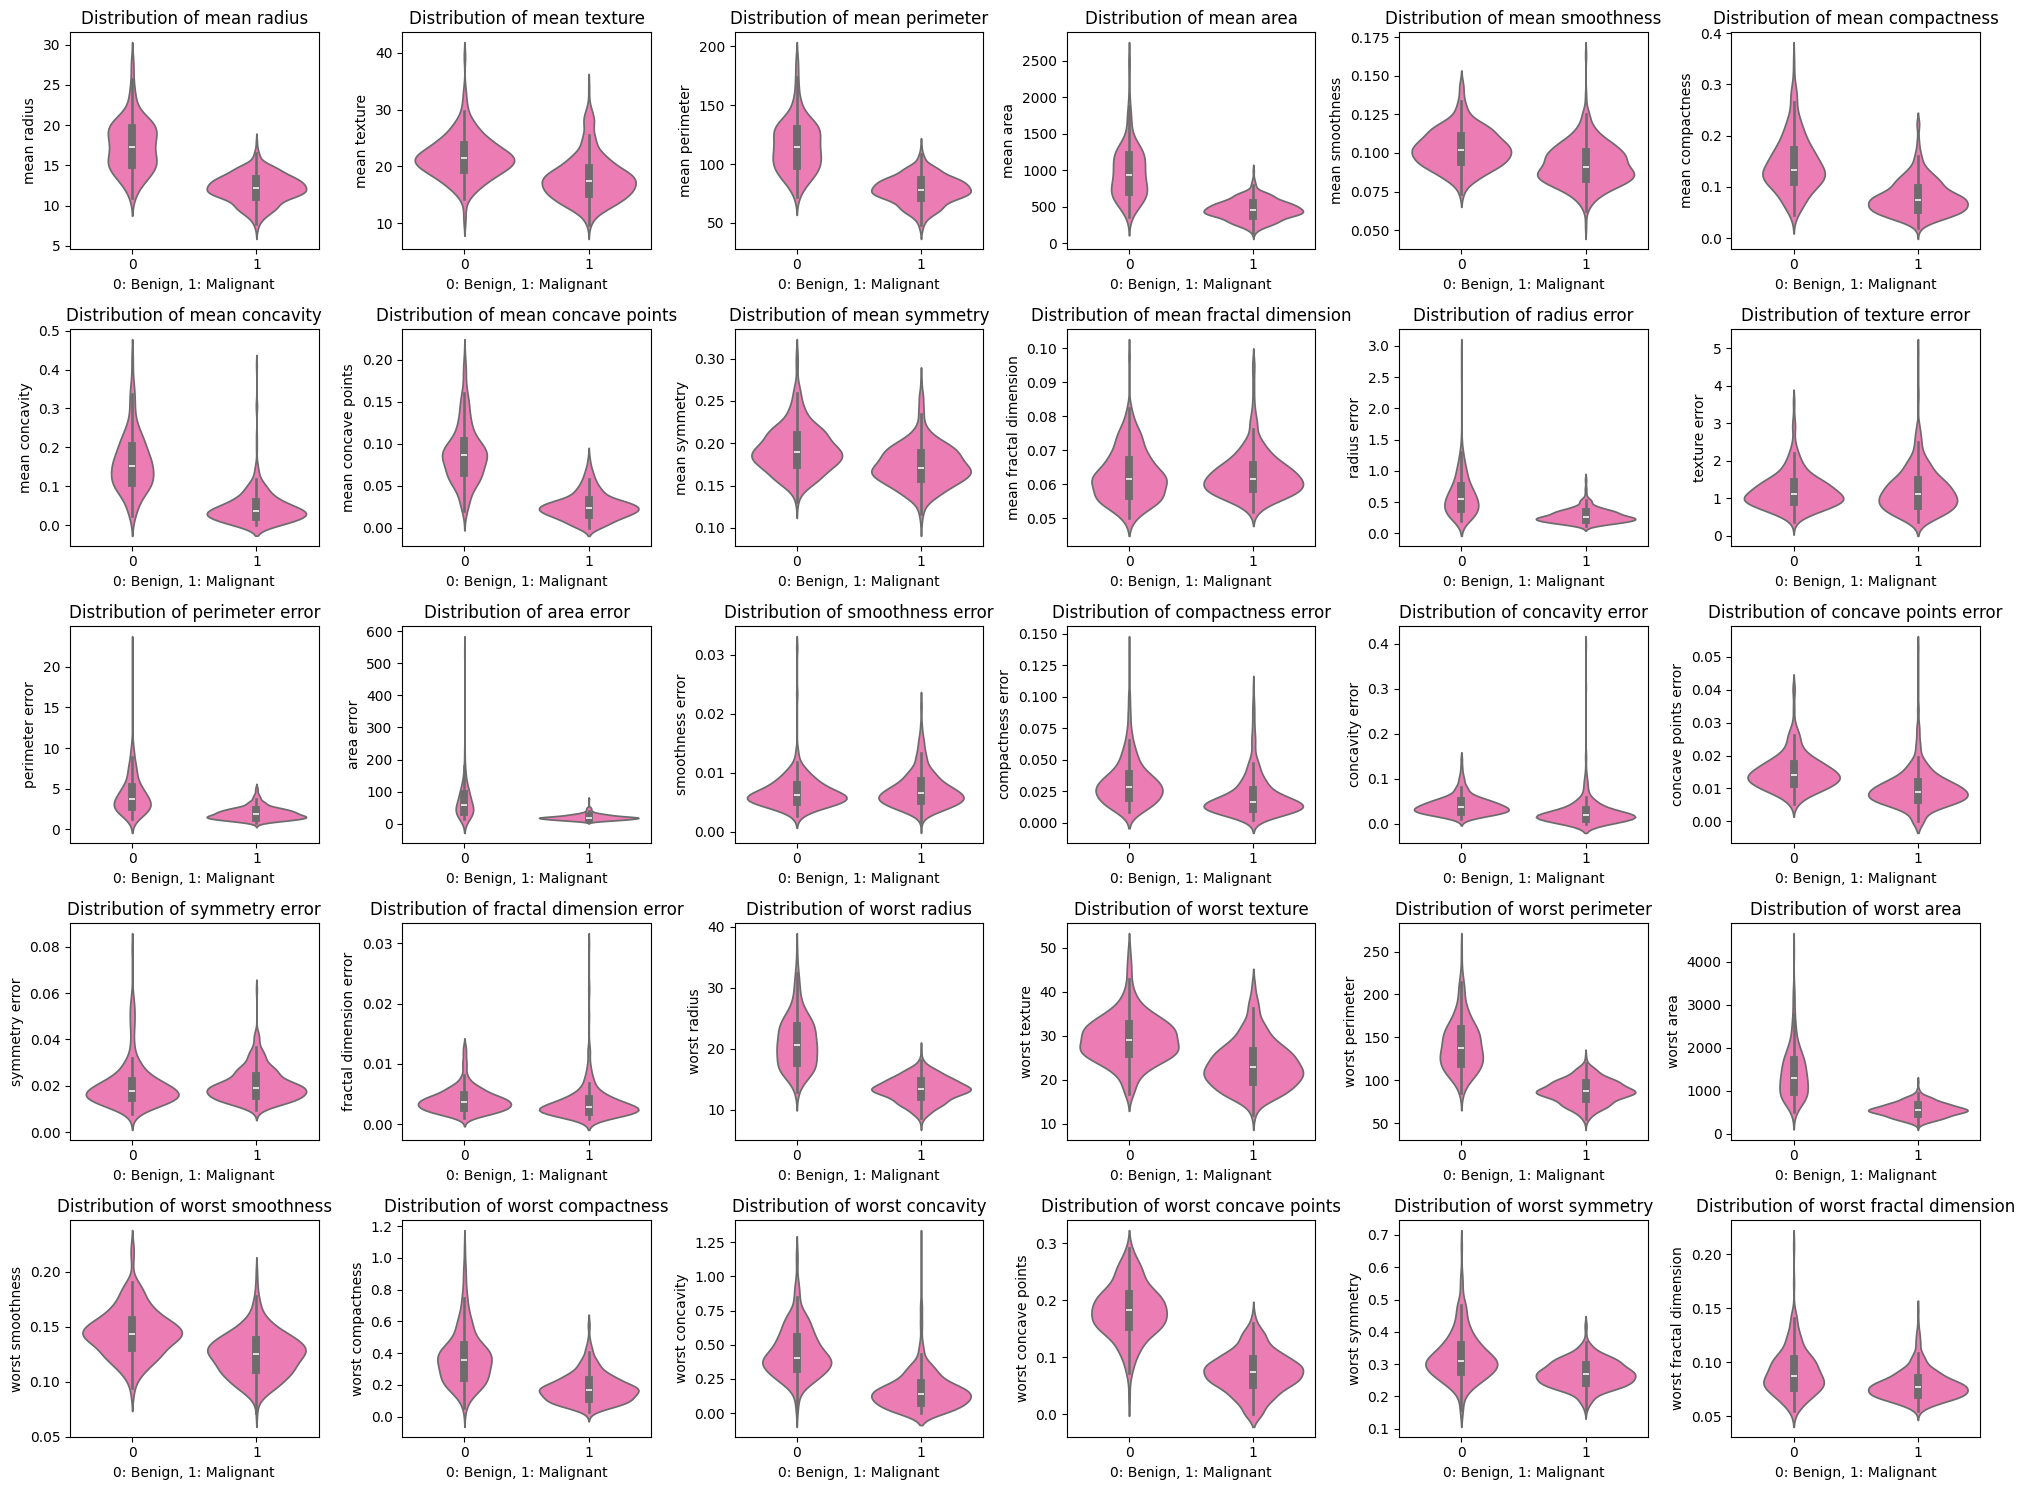

In [18]:
features = df.columns[:-1]
fig,axs = plt.subplots(nrows=5, ncols=6, figsize=(20,15))
axs = axs.flatten()
for i, feature in enumerate(features):
    sns.violinplot(x='target', y=feature, data=df, split=False, ax=axs[i], color='hotpink')
    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xlabel('0: Benign, 1: Malignant')
    axs[i].set_ylabel(feature)

for i in range(len(features), len(axs)):
    axs[i].remove()

plt.tight_layout()
plt.show()

In [19]:
x = df.drop(columns={'target'})
y = df['target']
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [22]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=2)
svm.fit(x_train, y_train)

SVC(C=2, kernel='linear')

In [23]:
prevision = svm.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, prevision)

0.958041958041958